In [8]:
"""
This notebook generates the log L2 ref - alt plots for diQTLs (Fig. 3A).
For example track and DeepSHAP plots, please see the example tracks directory.
"""

'\nThis notebook generates the log L2 ref - alt plots for diQTLs (Fig. 3A).\nFor example track and DeepSHAP plots, please see the example tracks directory.\n'

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [10]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "qtl_analysis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")

wget https://zenodo.org/records/10597358/files/qtl_analysis.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/qtl_analysis.tar.gz -C /Users/adamhe/github/scratch


In [12]:
# Load data

individual_folds = np.log10(
    pd.read_csv(
        os.path.join(SCRATCH, "qtl_analysis/diqtls_individual_folds_l2_scores.csv.gz"),
        index_col=0
    ) 
    + 1e-3
)
ensembled = np.log10(
    pd.read_csv(
        os.path.join(SCRATCH, "qtl_analysis/diqtls_l2_scores.csv.gz"),
        index_col=0
    ) 
    + 1e-3
)
composite = pd.concat([individual_folds, ensembled.loc[~ensembled.index.isin(individual_folds.index)]])

In [27]:
ensembled = pd.read_csv(
    os.path.join(SCRATCH, "qtl_analysis/diqtls_l2_scores.csv.gz"),
    index_col=0
).sort_values("is_holdout")
ensembled.expt = np.log10(ensembled.expt + 1e-3)
ensembled.pred = np.log10(ensembled.pred + 1e-3)

ensembled_ = ensembled.drop("is_holdout", axis=1)

In [38]:
print(pearsonr(ensembled.expt, ensembled.pred))
lr = LinearRegression(fit_intercept=True).fit(
        ensembled.expt.to_numpy().reshape(-1, 1),
        ensembled.pred.to_numpy().reshape(-1, 1)
    )
print(lr.coef_, lr.intercept_)
print(ensembled.shape)

PearsonRResult(statistic=0.6838108086795484, pvalue=1.0113008741883793e-220)
[[0.56157755]] [-0.35097805]
(1598, 3)


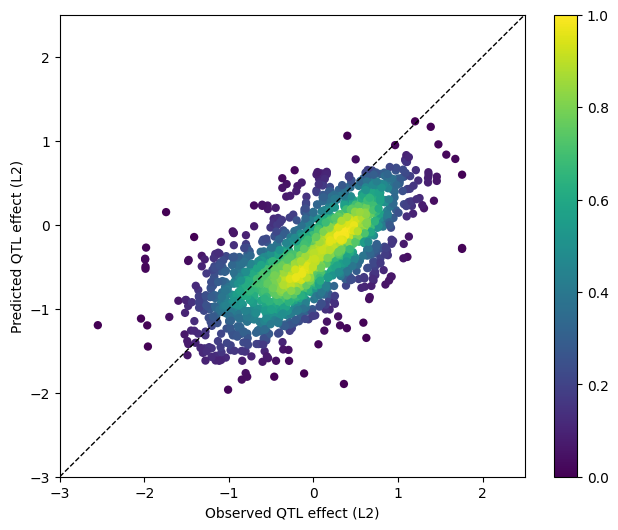

In [35]:
# Plot ensembled log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=ensembled_,
    x="expt",
    y="pred",
    c=gaussian_kde(ensembled_.transpose())(ensembled_.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3, 2.5)
ax.set_ylim(-3, 2.5)
ax.plot([-3, 2.5], [-3, 2.5], color="black", linestyle="--", linewidth=1)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)

plt.savefig("img/diqtl_l2.pdf")

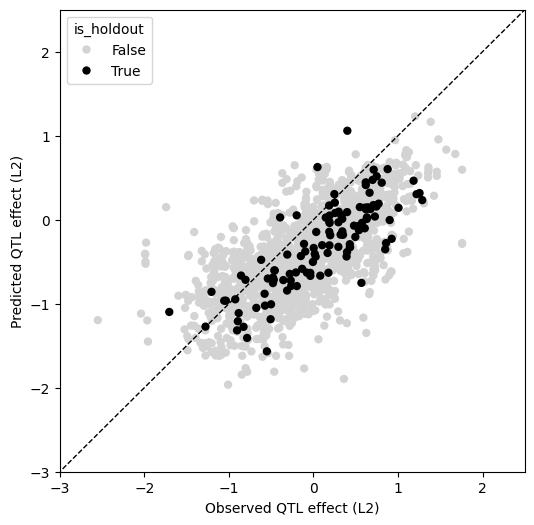

In [37]:
# Plot holdout log L2 ref - alt scores

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=ensembled,
    x="expt",
    y="pred",
    hue="is_holdout",
    alpha=1,
    linewidth=0,
    palette={0: 'lightgrey', 1: 'black'}
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3, 2.5)
ax.set_ylim(-3, 2.5)
ax.plot([-4, 2.5], [-4, 2.5], color="black", linestyle="--", linewidth=1)

plt.savefig("img/diqtl_l2_holdout.pdf")